# Trabajo de investigación nro 3
1. Nombre del alumno.
   
### 1. Desarrollo de modelos
Habilidades a desarrollar:
* Modelo supervisado (8 ptos)
Dataset 1: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database (500 vs 260)
  1. Undersampling y oversampling. Tomek Links, Scut, Smote.
  2. Clasificadores de Bayes
  3. Comparación de modelos de clasificación.
  4. Árboles de decisión 
     1. Iterative Dichotomizer 3
* Modelo no supervisado (5 ptos) https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data
  1. Clusterización a través de KMeans. Desarrollar el procedimiento para elegir un K.
  
### 2. Lectura (congreso)
Elegir el 1 o el 2
1. Congreso (hasta 4ptos) [opcional]
2. The Digitalist Papers. Un conjunto de 12 ensayos que presentan los posibles futuros que la revolución de la IA puede producir. (4 puntos)
   1. [Informational GPS](https://www.digitalistpapers.com/essays/informational-gps) [2pts]
      1. Según el ensayo ¿Qué relación existe entre la tecnología Global Positioning System (GPS) y los Large Language Models (LLMs)? Menciona las similitudes y diferencias en una tabla comparativa.
   2. Según en ensayo [The Potential for AI to Restore Local Community Connectedness, The Bedrock of a Healthy Democracy](https://www.digitalistpapers.com/essays/the-potential-for-ai-to-restore-local-community-connectedness-the-bedrock-of-a-healthy-democracy) responder las siguientes preguntas [2pts]
      1. ¿Cómo la IA puede ayudar a generar mejores conexiones con nuestra sociedad? 
      2. ¿Cómo las plataformas pueden ser la base de mejores redes de soporte en la comunidad?
      3. ¿Es posible utilizar IA para evitar posibles comentarios ofensivos? En caso sea así ¿Para qué se utilizaría?

### 3. Multimedia
Las siguientes entrevistas son realizadas a personas dirigiendo las compañías que están liderando el desarrollo de IA en el mundo. 
   1. [The Future Mark Zuckerberg Is Trying To Build](https://www.youtube.com/watch?v=oX7OduG1YmI)
   2. [Google CEO Sundar Pichai and the Future of AI](https://www.youtube.com/watch?v=5puu3kN9l7c)
   3. [Inside OpenAI, the Architect of ChatGPT, featuring Mira Murati](https://www.youtube.com/watch?v=p9Q5a1Vn-Hk)   

---

## Parte 1: Desarrollo de modelos

### 1.1 Modelo supervisado [8 pts]
El dataset Pima Indians Diabetes contiene información que permite predecir si un paciente tiene o no tiene diabetes basado en las siguientes características (features) `Pregnancies`,`Glucose`,`BloodPressure`,`SkinThickness`,`Insulin`,`BMI`,`DiabetesPedigreeFunction`,`Age`,`Outcome`.
1. **Pregnancies**: Número de embarazos que ha tenido la paciente.
2. **Glucose** Concentración de glucosa plasmática a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **BloodPressure** Presión arterial diastólica.
4. **SkinThickness** Grosor del pliegue cutáneo del tríceps.
5. **Insulin** Insulina sérica a 2 horas.
6. **BMI** Índice de masa corporal.
7. **DiabetesPedigreeFunction** Función que puntúa la probabilidad de diabetes basada en el historial familiar
8. **Age** Edad
9. **Outcome**: Variable objetivo/clase 
    Tipo: Binario (0 o 1)
    0 = No tiene diabetes
    1 = Tiene diabetes

#### Desarrollo

a) Luego de una lectura del dataset ¿Existe un desbalance en el dataset? En caso sea así ¿Cuál es la proporción de desbalance? [0.5 pts]

b) Identifique outliers en el dataset. En caso existan, elimínelos [0.5 pts]

c) Realice un TomekLinks undersampling [1 pts]

d) Realice un SMOte oversampling [1 pts]

e) Desarrolle un modelo de clasificación basado en LogisticRegression, SVM y BayesClassifier y Árboles de decisión. [1 pts]

f) Compare la performance de cada modelo en tres etapas. [2 pts]
    * Modelo sin balanceo de datos.
    * Modelo con undersampling.
    * Modelo con oversampling. 
    La comparación debe ser numérica (Accuracy, Precision, Recalll y F1-Score) y gráfica (Matriz de confusión, curvas ROC)

g) Puntaje según la precisión obtenida. Se pueden utilizar métodos de regularización, kernels y demás parámetros permitidos por cada modelo. 
    Acc entre 0-60 -> 0 ptos
    Acc entre 60-85 -> 1 ptos
    Acc entre 86-100 -> 1 ptos


#### **1. Parte 1 - Desarrollo de modelos**
___

##### **1.1. Modelo con Dataset Diabetes**
___

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# a) Carga de dataset
dataDiabetes = pd.read_csv('diabetes.csv')

In [14]:
dataDiabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
# b) Identificación 

# Calcular Q1, Q3 y IQR
Q1 = dataDiabetes.quantile(0.25)
Q3 = dataDiabetes.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers (fuera de los límites de 1.5 * IQR)
outliers = ((dataDiabetes < (Q1 - 1.5 * IQR)) | (dataDiabetes > (Q3 + 1.5 * IQR)))

# Mostrar los datos que contienen outliers
print("Datos con outliers:")
print(dataDiabetes[outliers.any(axis=1)])


Datos con outliers:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
12            10      139             80              0        0  27.1   
..           ...      ...            ...            ...      ...   ...   
706           10      115              0              0        0   0.0   
707            2      127             46             21      335  34.4   
710            3      158             64             13      387  31.2   
715            7      187             50             33      392  33.9   
753            0      181             88             44      510  43.3   

     DiabetesPedigreeFunction  Age  Outcome  
4                       2.288   33        1  

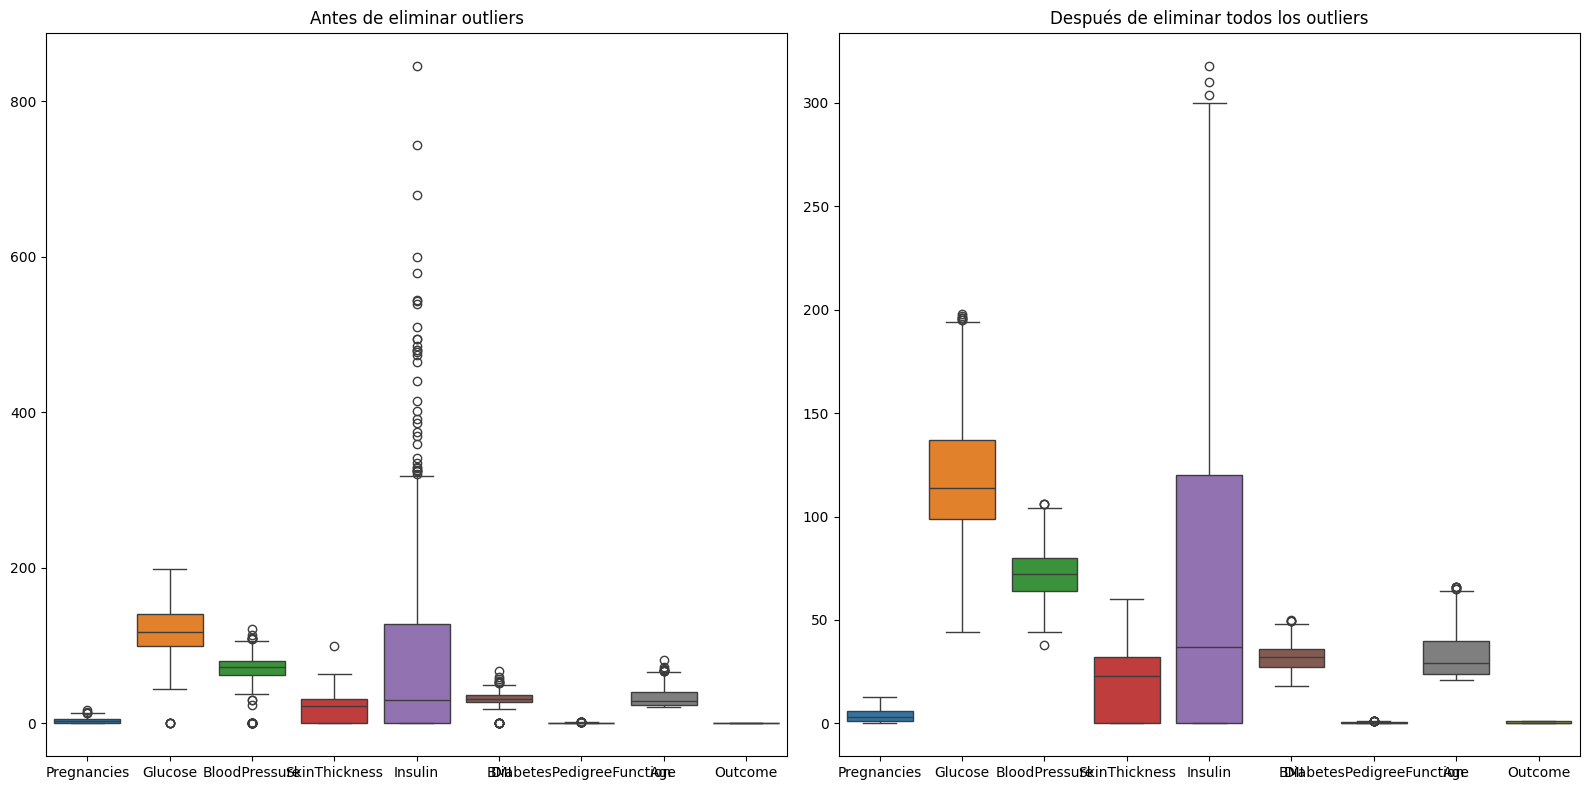

Datos originales: 768
Datos después de eliminar outliers: 639


In [16]:
# b) Eliminar outliers
dataDiabetesWO = dataDiabetes[~((dataDiabetes < (Q1 - 1.5 * IQR)) | (dataDiabetes > (Q3 + 1.5 * IQR))).any(axis=1)]

# Crear subplots para comparar el antes y el después
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# "Antes" de eliminar los outliers
sns.boxplot(data=dataDiabetes, ax=axes[0])
axes[0].set_title("Antes de eliminar outliers")

# "Después" de eliminar los outliers
sns.boxplot(data=dataDiabetesWO, ax=axes[1])
axes[1].set_title("Después de eliminar todos los outliers")

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# Revisar la cantidad de datos eliminados
print(f"Datos originales: {len(dataDiabetes)}")
print(f"Datos después de eliminar outliers: {len(dataDiabetesWO)}")


In [17]:
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

x = dataDiabetesWO.drop(columns=['Outcome'])
y = dataDiabetesWO['Outcome']

# Tomek links - Undersampling
tomek = TomekLinks()
x_resampled_tomek, y_resampled_tomek = tomek.fit_resample(x, y)

# Smote - Oversampling
smote = SMOTE()
x_resampled_smote, y_resampled_smote = smote.fit_resample(x, y)

# Mostrar resultados
print("Distribución original de clases:", y.value_counts())
print("Distribución de clases después de Tomek Links:", y_resampled_tomek.value_counts())
print("Distribución de clases después de SMOTE:", y_resampled_smote.value_counts())

Distribución original de clases: Outcome
0    439
1    200
Name: count, dtype: int64
Distribución de clases después de Tomek Links: Outcome
0    396
1    200
Name: count, dtype: int64
Distribución de clases después de SMOTE: Outcome
1    439
0    439
Name: count, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X = dataDiabetes.drop(columns=['Outcome'])
y = dataDiabetes['Outcome']

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SupportVectorClassifier': SVC(),
    'GaussianNB': GaussianNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}


In [19]:
# 1. Modelos con los datos originales sin balanceo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name}: \n {classification_report(y_test, y_pred)}\n")

LogisticRegression: 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


SupportVectorClassifier: 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154


GaussianNB: 
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted 

In [20]:
# 2. Modelos con los datos de Tomek Links (undersampling)
X_train_tomek, X_test_tomek, y_train_tomek, y_test_tomek = train_test_split(x_resampled_tomek, y_resampled_tomek, test_size=0.2, random_state=42)
for model_name, model in models.items():
    model.fit(X_train_tomek, y_train_tomek)
    y_pred = model.predict(X_test_tomek)
    print(f"{model_name}: \n {classification_report(y_test_tomek, y_pred)}")

LogisticRegression: 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84        80
           1       0.70      0.53      0.60        40

    accuracy                           0.77       120
   macro avg       0.74      0.71      0.72       120
weighted avg       0.76      0.77      0.76       120

SupportVectorClassifier: 
               precision    recall  f1-score   support

           0       0.76      0.93      0.84        80
           1       0.74      0.42      0.54        40

    accuracy                           0.76       120
   macro avg       0.75      0.68      0.69       120
weighted avg       0.75      0.76      0.74       120

GaussianNB: 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        80
           1       0.66      0.62      0.64        40

    accuracy                           0.77       120
   macro avg       0.74      0.73      0.73       120
weighted av

In [21]:
# 3. Modelos con los datos de Smote (oversampling)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(x_resampled_smote, y_resampled_smote, test_size=0.2, random_state=42)
for model_name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test_tomek)
    print(f"{model_name}: \n {classification_report(y_test_tomek, y_pred)}")

LogisticRegression: 
               precision    recall  f1-score   support

           0       0.85      0.79      0.82        80
           1       0.63      0.72      0.67        40

    accuracy                           0.77       120
   macro avg       0.74      0.76      0.75       120
weighted avg       0.78      0.77      0.77       120

SupportVectorClassifier: 
               precision    recall  f1-score   support

           0       0.87      0.72      0.79        80
           1       0.58      0.78      0.67        40

    accuracy                           0.74       120
   macro avg       0.73      0.75      0.73       120
weighted avg       0.77      0.74      0.75       120

GaussianNB: 
               precision    recall  f1-score   support

           0       0.84      0.79      0.81        80
           1       0.62      0.70      0.66        40

    accuracy                           0.76       120
   macro avg       0.73      0.74      0.74       120
weighted av

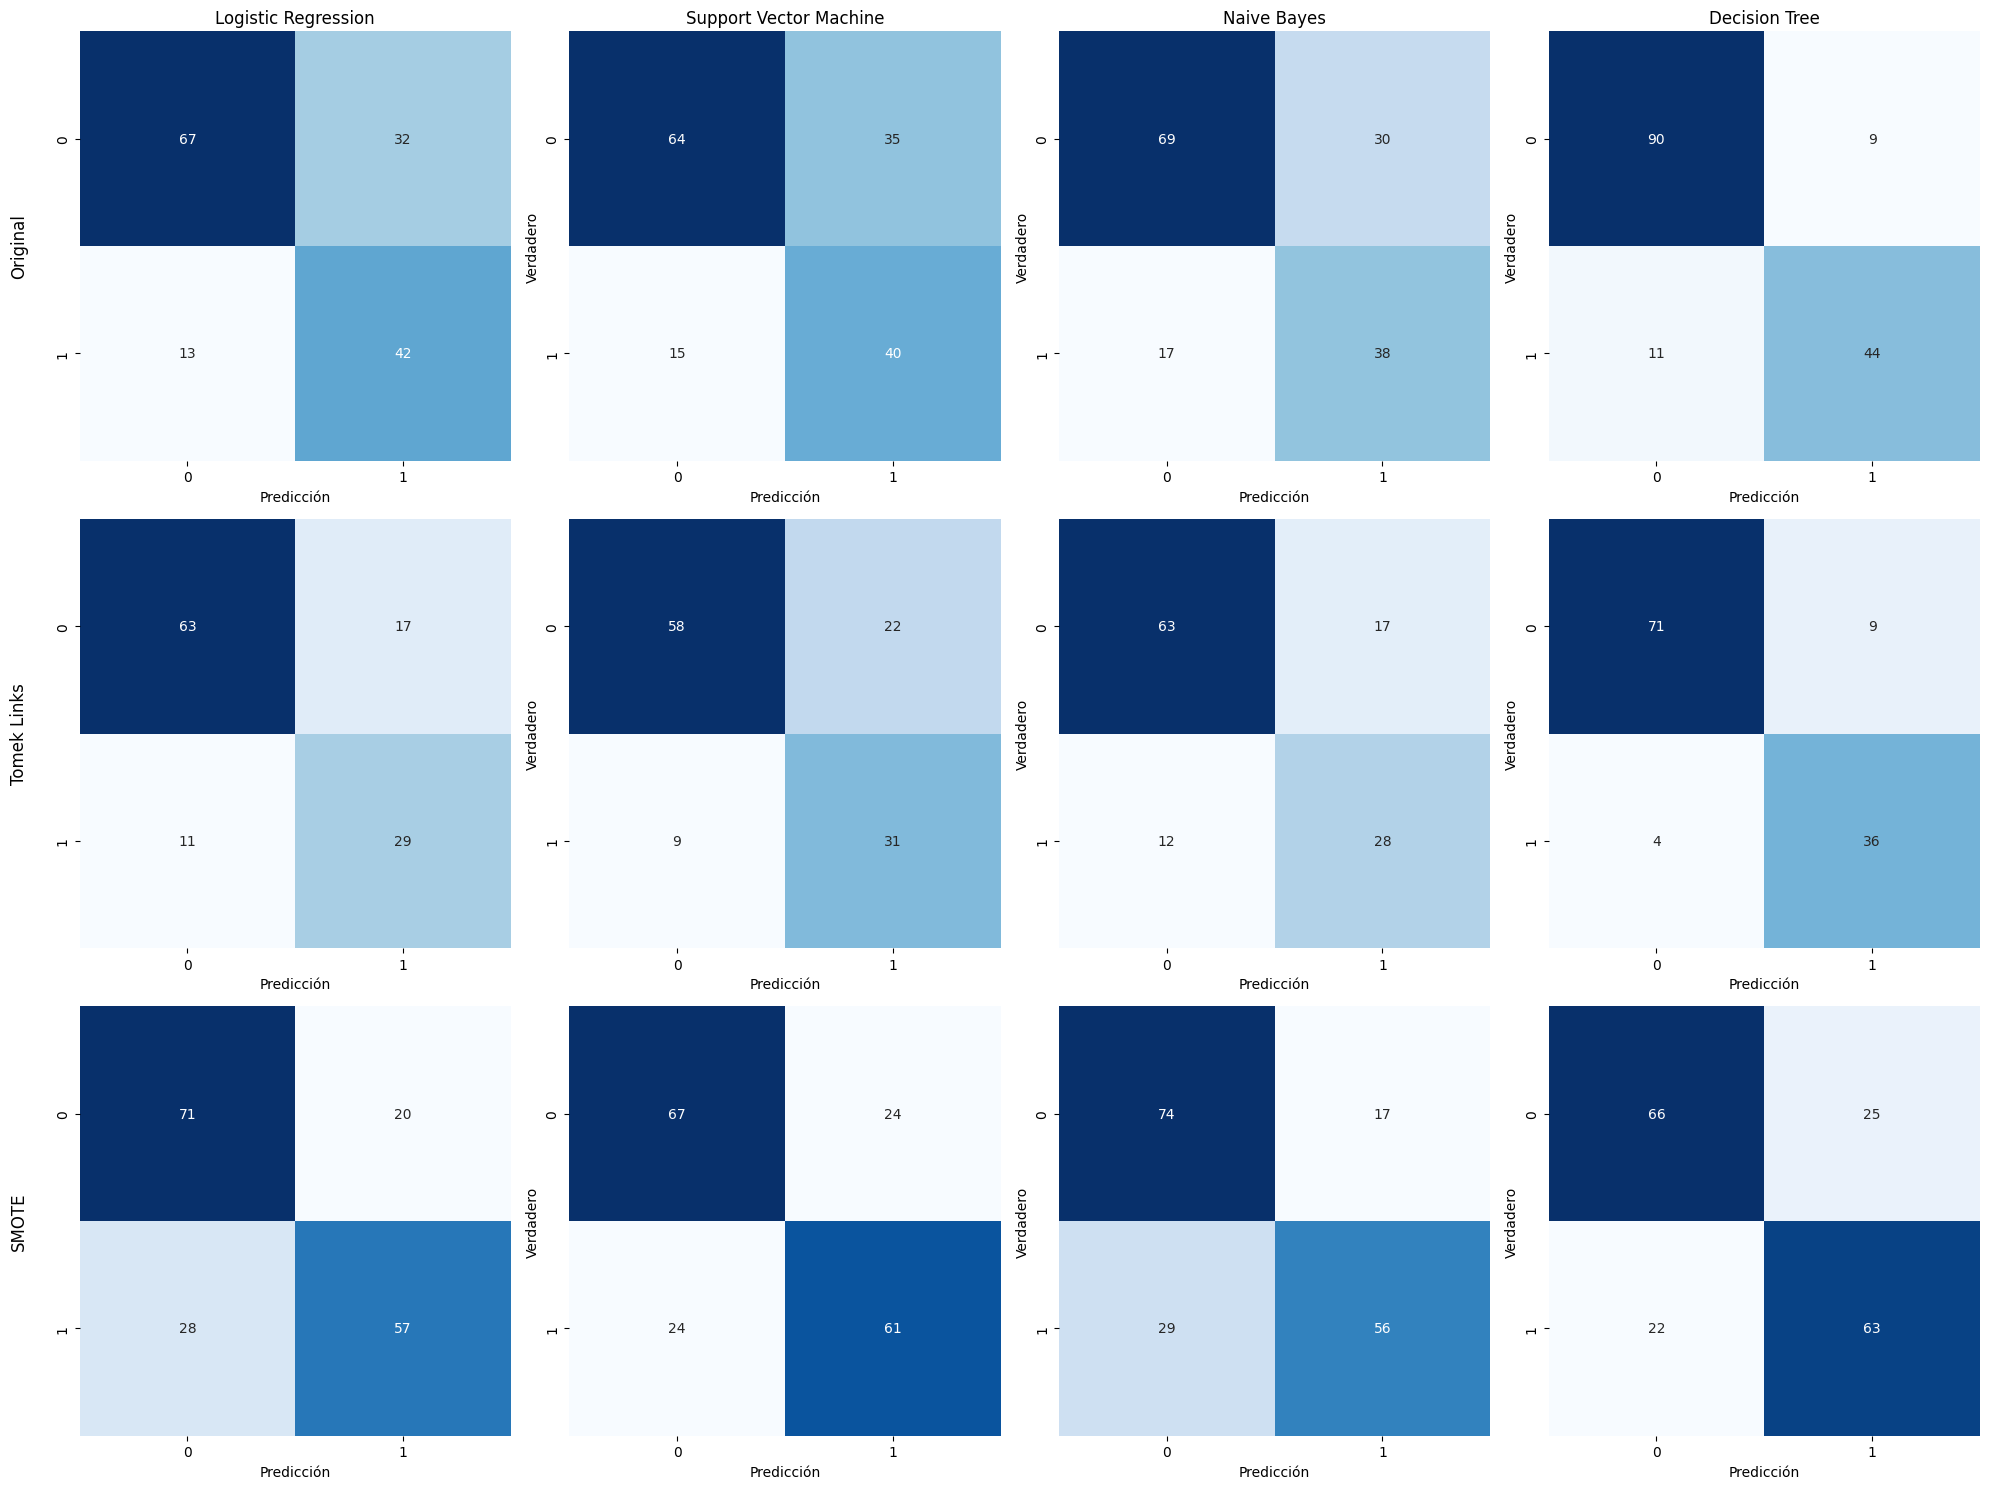

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = {
    "Original": {
        "LogisticRegression": models['LogisticRegression'].predict(X_test),
        "SupportVectorClassifier": models['SupportVectorClassifier'].predict(X_test),
        "GaussianNB": models['GaussianNB'].predict(X_test),
        "DecisionTreeClassifier": models['DecisionTreeClassifier'].predict(X_test)
    },
    "Tomek Links": {
        "LogisticRegression": models['LogisticRegression'].predict(X_test_tomek),
        "SupportVectorClassifier": models['SupportVectorClassifier'].predict(X_test_tomek),
        "GaussianNB": models['GaussianNB'].predict(X_test_tomek),
        "DecisionTreeClassifier": models['DecisionTreeClassifier'].predict(X_test_tomek)
    },
    "SMOTE": {
        "LogisticRegression": models['LogisticRegression'].predict(X_test_smote),
        "SupportVectorClassifier": models['SupportVectorClassifier'].predict(X_test_smote),
        "GaussianNB": models['GaussianNB'].predict(X_test_smote),
        "DecisionTreeClassifier": models['DecisionTreeClassifier'].predict(X_test_smote)
    }
}

true_values = {
    "Original": y_test,
    "Tomek Links": y_test_tomek,
    "SMOTE": y_test_smote
}

fig, axes = plt.subplots(3, 4, figsize=(20, 15))

model_names = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "Decision Tree"]
scenario_names = ["Original", "Tomek Links", "SMOTE"]

for ax, col in zip(axes[0], model_names):
    ax.set_title(col)

for i, scenario in enumerate(predictions.keys()):
    for j, model_name in enumerate(predictions[scenario].keys()):
        y_true = true_values[scenario]
        y_pred = predictions[scenario][model_name]
        
        cm = confusion_matrix(y_true, y_pred)
        
        ax = axes[i, j]
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
        ax.set_xlabel("Predicción")
        ax.set_ylabel("Verdadero")

for i, ax in enumerate(axes[:, 0]):
    ax.set_ylabel(scenario_names[i], rotation=90, size='large', labelpad=20)

plt.tight_layout()
plt.show()


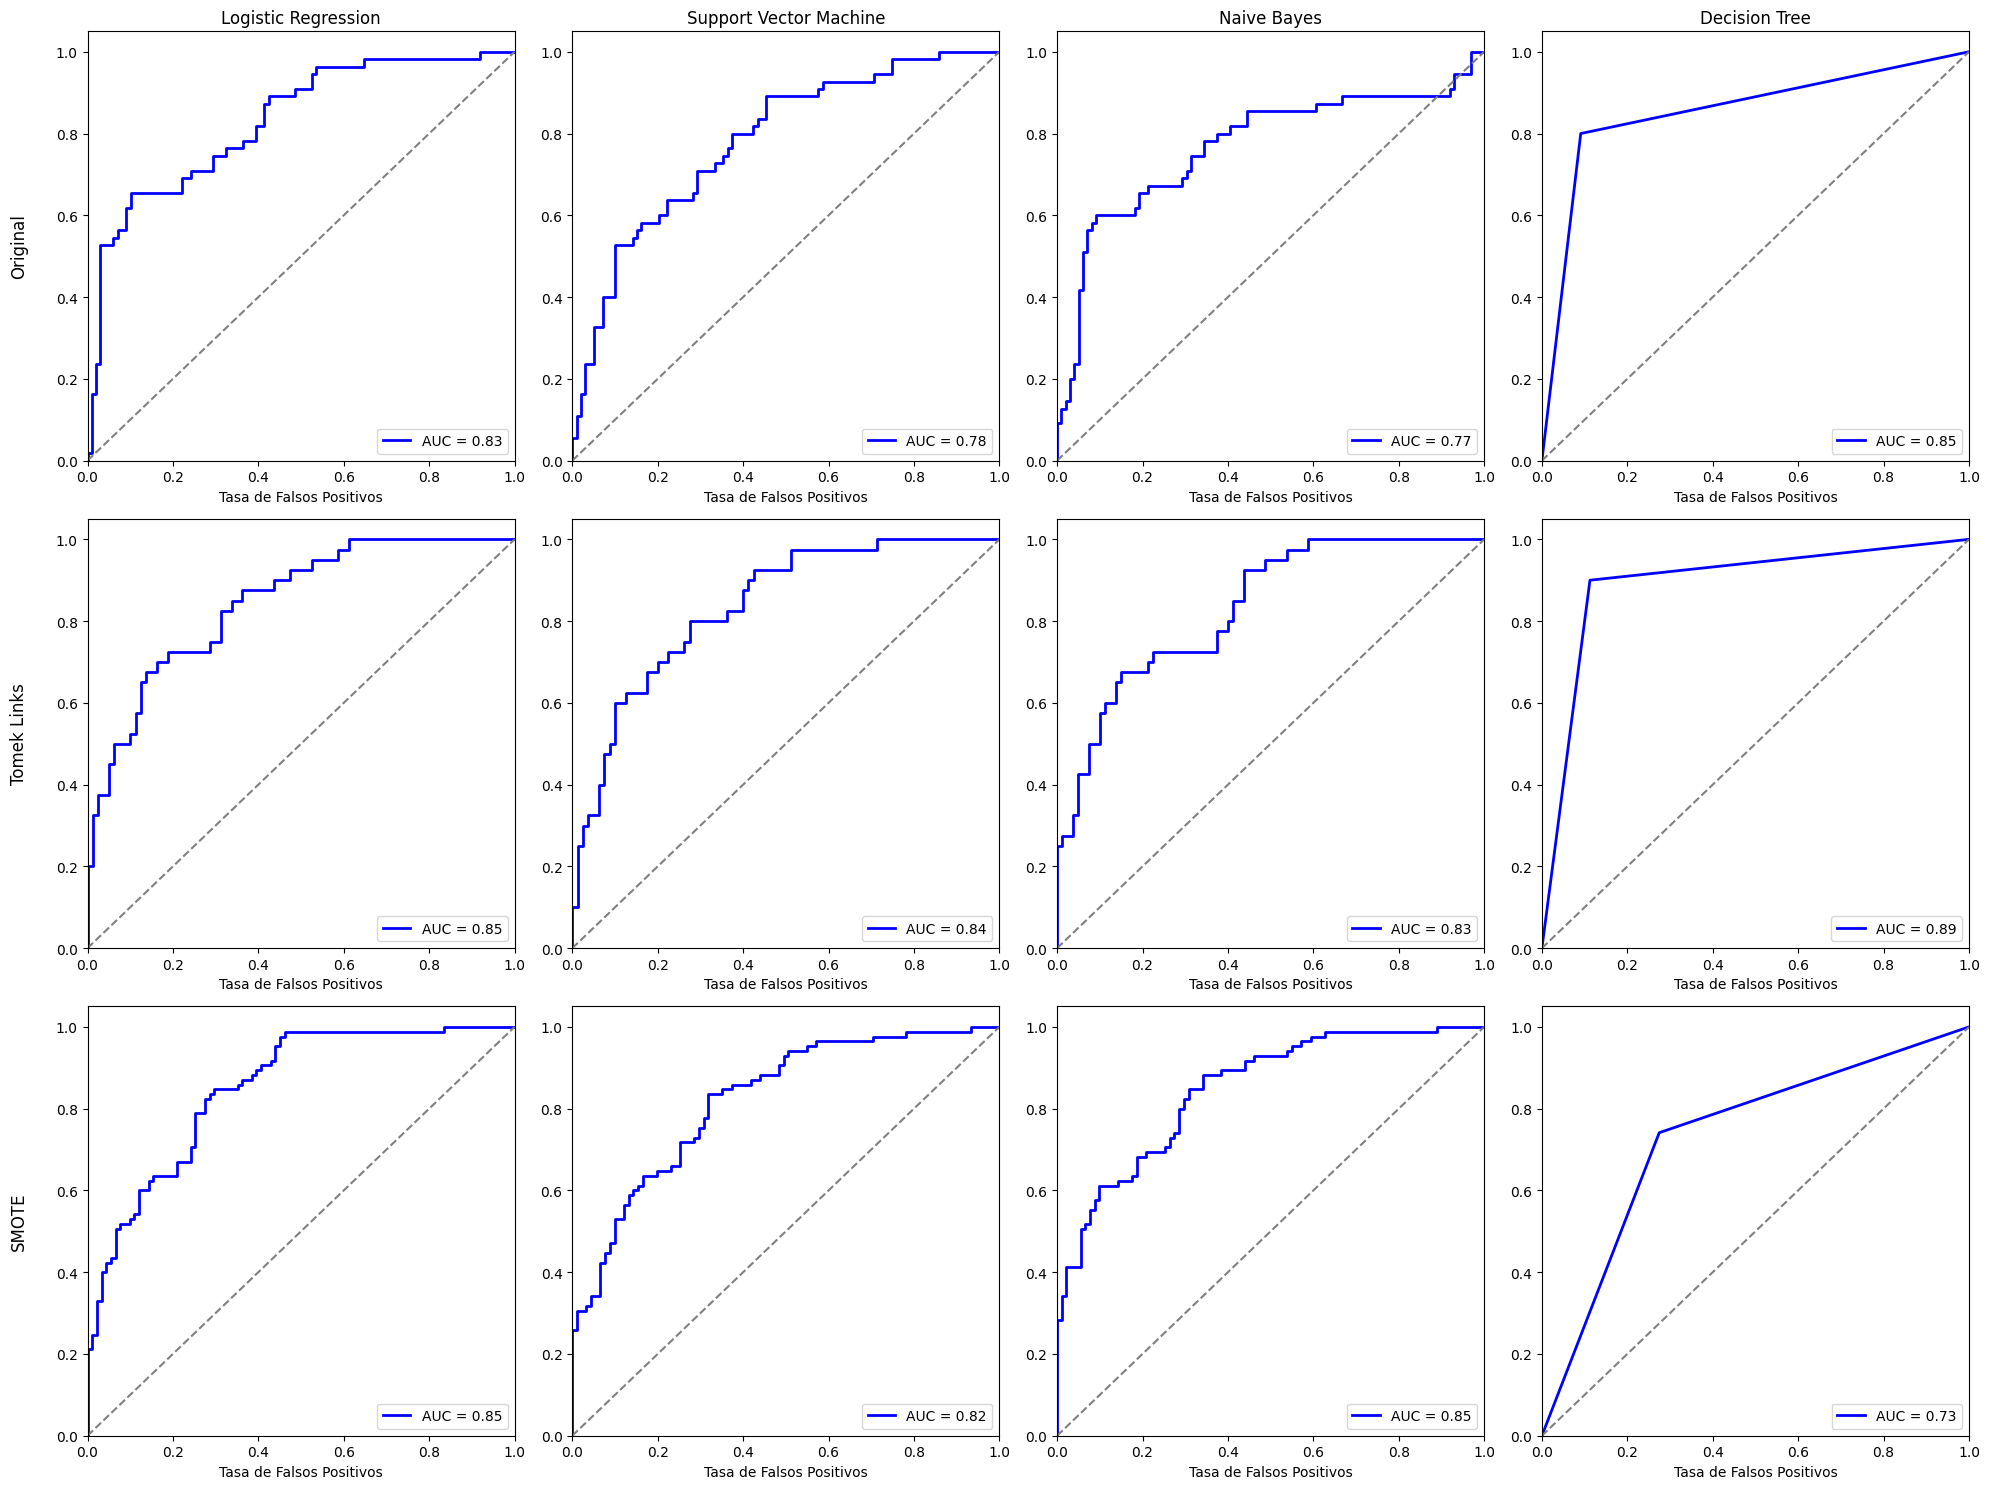

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

prob_predictions = {
    "Original": {
        "LogisticRegression": models['LogisticRegression'].predict_proba(X_test)[:, 1],
        "SupportVectorClassifier": models['SupportVectorClassifier'].decision_function(X_test),
        "GaussianNB": models['GaussianNB'].predict_proba(X_test)[:, 1],
        "DecisionTreeClassifier": models['DecisionTreeClassifier'].predict_proba(X_test)[:, 1]
    },
    "Tomek Links": {
        "LogisticRegression": models['LogisticRegression'].predict_proba(X_test_tomek)[:, 1],
        "SupportVectorClassifier": models['SupportVectorClassifier'].decision_function(X_test_tomek),
        "GaussianNB": models['GaussianNB'].predict_proba(X_test_tomek)[:, 1],
        "DecisionTreeClassifier": models['DecisionTreeClassifier'].predict_proba(X_test_tomek)[:, 1]
    },
    "SMOTE": {
        "LogisticRegression": models['LogisticRegression'].predict_proba(X_test_smote)[:, 1],
        "SupportVectorClassifier": models['SupportVectorClassifier'].decision_function(X_test_smote),
        "GaussianNB": models['GaussianNB'].predict_proba(X_test_smote)[:, 1],
        "DecisionTreeClassifier": models['DecisionTreeClassifier'].predict_proba(X_test_smote)[:, 1]
    }
}

true_values = {
    "Original": y_test,
    "Tomek Links": y_test_tomek,
    "SMOTE": y_test_smote
}

fig, axes = plt.subplots(3, 4, figsize=(20, 15))

for ax, col in zip(axes[0], model_names):
    ax.set_title(col)

for i, ax in enumerate(axes[:, 0]):
    ax.set_ylabel(scenario_names[i], rotation=90, size='large', labelpad=20)

for i, scenario in enumerate(prob_predictions.keys()):
    for j, model_name in enumerate(prob_predictions[scenario].keys()):
        y_true = true_values[scenario]
        y_score = prob_predictions[scenario][model_name]
        
        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)
        
        ax = axes[i, j]
        
        ax.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
        ax.plot([0, 1], [0, 1], color='gray', linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel("Tasa de Falsos Positivos")
        ax.legend(loc="lower right")

plt.tight_layout()
plt.show()
